## Demo 1: How to Create Superpostion in Qiskit?

In [1]:
from qiskit import QuantumCircuit, Aer, assemble, execute, BasicAer
import qiskit
from qiskit_textbook.tools import array_to_latex
from qiskit.tools.visualization import plot_histogram
import numpy as np

### Add Hadamard gate to a qubit initialized at $| 0 \rangle$

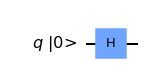

In [2]:
# create a circuit with single quantum register 
circ = QuantumCircuit(1)

#add Hadamard operation to the register, 0 showing its index
circ.h(0)                  

#draw the circuit
circ.draw(initial_state=True, cregbundle=False, output='mpl')

### Visualizing the state $\frac{ |0 \rangle + | 1 \rangle }{\sqrt 2}$ on the qubit

In [3]:
#obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

#assemble the circuit
qobj = assemble(circ)

#run simulator to get final state
final_state = simulator.run(qobj).result().get_statevector()

#display the state vector
array_to_latex(final_state, pretext="\\text{Statevector} = ")
#print(final_state)

<IPython.core.display.Math object>

## Demo 2: How to perform measurement ?

### Create a quantum register with a superposition and a classical register

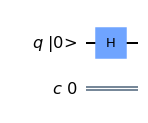

In [4]:
circ = QuantumCircuit(1,1)     # Create circuit with a quantum register  and a classical register
circ.h(0)                                        # Add Hadamard gate, 0 denotes index of the quantum register
circ.draw(initial_state=True, cregbundle=False, output='mpl')

### Measure the quantum register on the classical register

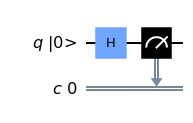

In [5]:
circ.measure([0],[0])                    #  [0], [0] to tell first quantum register to be measured in the first classical register
circ.draw(initial_state=True, cregbundle=False, output='mpl') 

### Simulate the circuit and observe the statevector

In [6]:
simulator = Aer.get_backend('statevector_simulator')                          # obtain a state_vector_simulator
qobj = assemble(circ)                                                                                         # assemble the circuit
final_state = simulator.run(qobj).result().get_statevector()  
array_to_latex(final_state, pretext="\\text{Statevector} = ")              #d isplay the state vector

<IPython.core.display.Math object>

### Simulate the circuit 100 times and observe output

{'0': 58, '1': 42}


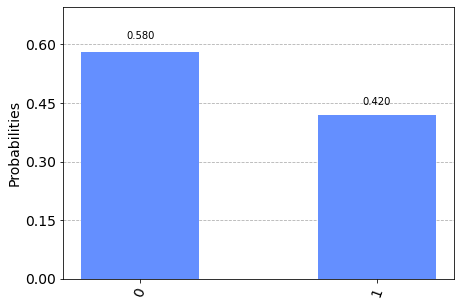

In [7]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circ, backend = simulator, shots=100) 
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts)

### Task 0:                                           

#### i) Create swap circuit without using inbuilt swap function.                                                 (5)

* Circuit is implemented using 3 CNOT operations
* NOT is applied to the second qubit register as a way to create a different state ( |1> ) to swap with the first qubit register ( |0> ). This is done to ensure that the swap operation is successfully verified since initially both qubit registers are in the same state ( |0> ). Note that NOT satisfies no role in the actual SWAP procedure, it is placed just to create a different qubit

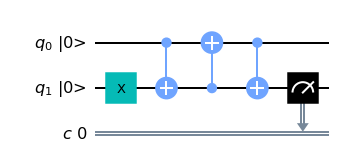

In [8]:
circ = QuantumCircuit(2,1)
circ.x(1)
circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)
circ.measure(1,0)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

* Measuring the qubit registers after the swap operation is performed, we can see that the qubit registers are swapped
* Circuit in which second qubit is observed. Note that it was initialised to |1> and is now in |0> state after the swap operation.

In [9]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circ, backend = simulator, shots=1) 
result = job.result()
counts = result.get_counts(circ)
print(counts)

{'0': 1}


* Measuring the qubit registers after the swap operation is performed, we can see that the qubit registers are swapped
* Circuit in which first qubit is observed. Note that it was initialised to |0> and is now in |1> state after the swap operation.

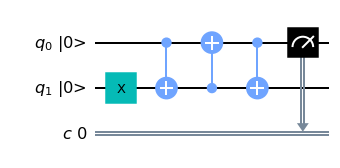

In [10]:
circ = QuantumCircuit(2,1)
circ.x(1)
circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)
circ.measure(0,0)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circ, backend = simulator, shots=1) 
result = job.result()
counts = result.get_counts(circ)
print(counts)

{'1': 1}


#### ii) Visualize your circuit and verify using state-vector simulator. (3)

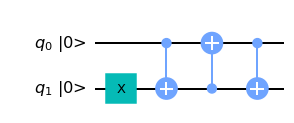

In [12]:
circ = QuantumCircuit(2)
circ.x(1)
circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

In [13]:
#obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

#assemble the circuit
qobj = assemble(circ)

#run simulator to get final state
final_state = simulator.run(qobj).result().get_statevector()

#display the state vector
array_to_latex(final_state, pretext="\\text{Statevector} = ")
#print(final_state)

<IPython.core.display.Math object>

#### iii) Measure the qubits using classical registers. (2)

* done above

### Task 1: Create Equal Superposition on 2 qubits. (10)

* Equal superposition is created by applying Hadamard gate to both qubits
* Observe that we get equal probabilities for all the states, demonstrating that the superposition is equal

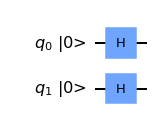

In [34]:
circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

In [35]:
simulator = Aer.get_backend('aer_simulator')
circ.save_statevector()
qobj = assemble(circ)
result = simulator.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

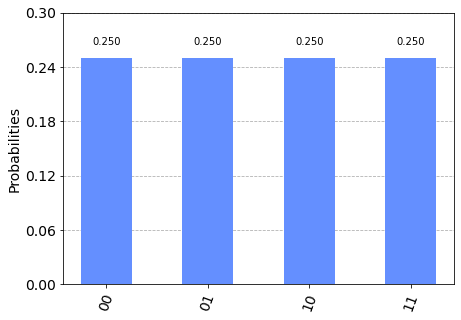

In [37]:
plot_histogram(result.get_counts())

### Task 2: 

#### i) Create Entangled State $\frac{|00\rangle + |11\rangle}{\sqrt 2}$.   (5)

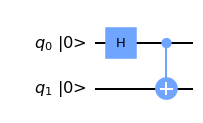

In [21]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

#### ii) Verify using state-vector simulator that the circuit works (5)

In [22]:
simulator = Aer.get_backend('aer_simulator')
circ.save_statevector()
qobj = assemble(circ)
result = simulator.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

* Observe the equal probability distribution on the histogram between |00> and |11> states, demonstrating that the entangled state is created

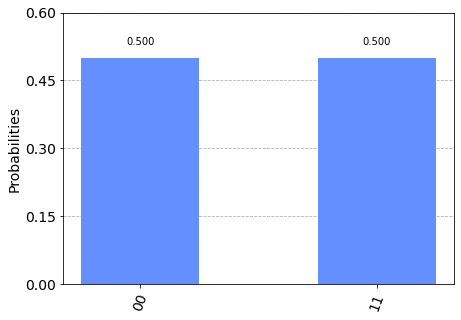

In [23]:
plot_histogram(result.get_counts())

#### ii) Measure 1st qubit, 2nd qubit, and then both qubit. (5)

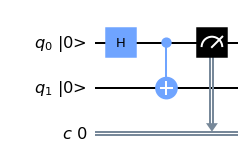

In [37]:
circ = QuantumCircuit(2,1)
circ.h(0)
circ.cx(0,1)
circ.measure(0,0)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

{'1': 51, '0': 49}


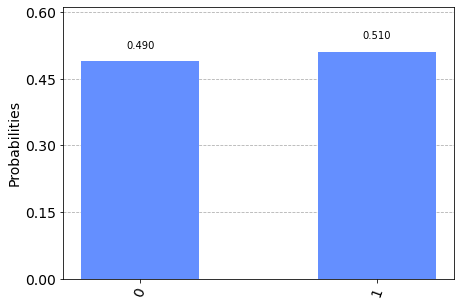

In [38]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circ, backend = simulator, shots=100)
result = job.result()
counts = result.get_counts(circ)

print(counts)
plot_histogram(counts)

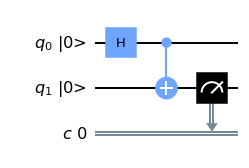

In [39]:
circ = QuantumCircuit(2,1)
circ.h(0)
circ.cx(0,1)
circ.measure(1,0)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

{'1': 49, '0': 51}


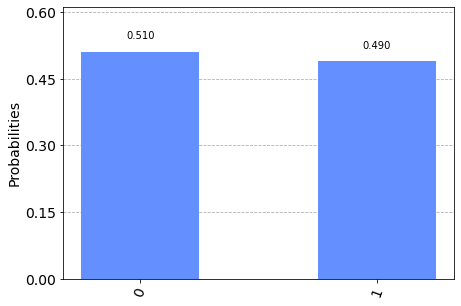

In [40]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circ, backend = simulator, shots=100)
result = job.result()
counts = result.get_counts(circ)

print(counts)
plot_histogram(counts)

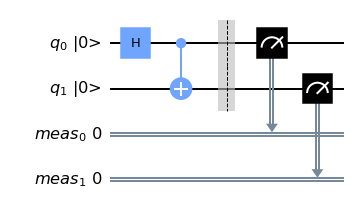

In [43]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.measure_all()
circ.draw(initial_state=True, cregbundle=False, output='mpl')

{'11': 53, '00': 47}


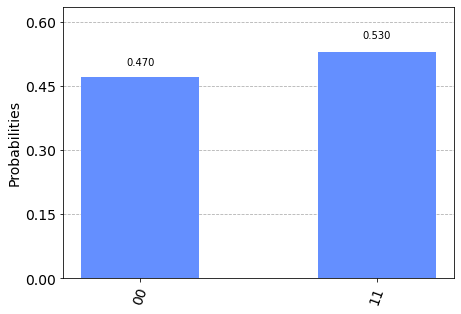

In [42]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circ, backend = simulator, shots=100)
result = job.result()
counts = result.get_counts(circ)

print(counts)
plot_histogram(counts)

### Task 3: 

#### i) Perform CNOT operation $x, y, z \rightarrow x, y, x \oplus z$, without direct interaction between $x$ and $z$. (10)

* CNOT operation is performed by first using the SWAP gate between x and y, then applying CNOT gate between x and z, and finally using the SWAP gate between x and y again to bring the qubits back to their original positions

* Purely for the purpose of initialising x to 1, NOT gate is applied to x

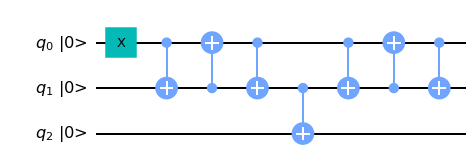

In [45]:
circ = QuantumCircuit(3)
circ.x(0)
circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)
circ.cx(1,2)
circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

In [46]:
#obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

#assemble the circuit
qobj = assemble(circ)

#run simulator to get final state
final_state = simulator.run(qobj).result().get_statevector()

#display the state vector
array_to_latex(final_state, pretext="\\text{Statevector} = ")
#print(final_state)

<IPython.core.display.Math object>

#### ii) Show the action of the circuit as matrix. (5)

* Note that while computing the action of the circuit, I have removed the NOT gate in the circuit above since that was used purely for initialisation and had no part in the logic of the circuit

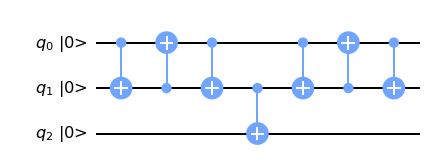

In [49]:
circ = QuantumCircuit(3)
# circ.x(0)
circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)
circ.cx(1,2)
circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)
circ.draw(initial_state=True, cregbundle=False, output='mpl')

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


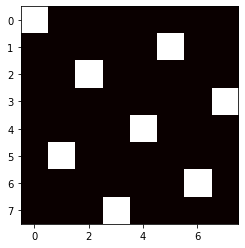

In [50]:
actionMatrix = qiskit.quantum_info.Operator(circ).data
print(actionMatrix)
import matplotlib.pyplot as plt
plt.imshow(np.real(actionMatrix), cmap='hot', interpolation='nearest')
plt.show()

# References:
* For action matrix: https://quantumcomputing.stackexchange.com/questions/14280/how-can-i-obtain-transformation-matrix-of-a-quantum-circuit-in-the-qiskit
* In general qiskit.org documentation was referred to for understanding the different functions and their usage
* Demo code (from this notebook) has been directly copied in some cells

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca07e71c-a109-409c-8272-99812e4a09be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>